In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
### Reference datasets
dref = 'batch_std'

In [3]:
### Load kapp data
df_kapp = pd.read_excel('../../parameterization/kapp/results/kapp_bydatagroup_inPerSec.xlsx')
df_kapp.index = df_kapp.id.to_list()
rxns = df_kapp.index.to_list()
groups = df_kapp.columns[3:].to_list()
groups = [g for g in groups if g != 'chemo_highN']

kappref = df_kapp[dref]
kappref = kappref[(kappref.isnull() == False) & (kappref > 0)]

In [4]:
### Compile kapp / kappref
rxns = df_kapp.index.to_list()
df_ratio = pd.DataFrame(index=rxns, columns=['rxn'] + groups)
df_ratio['rxn'] = df_ratio.index.to_list()

for rxn in rxns:
    if rxn not in kappref.index:
        continue
    
    vref = kappref[rxn]
    if pd.isnull(vref):
        continue
    
    for group in groups:
        v = df_kapp.loc[rxn, group]
        if pd.isnull(v) == False:
            df_ratio.loc[rxn, group] = v / vref

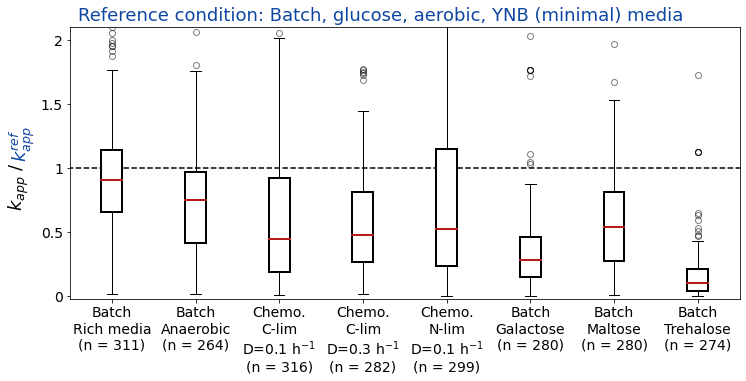

In [25]:
groups_plot = [g for g in groups if g != dref]
fig,ax = plt.subplots(figsize=(12,5))

# Boxplot settings
w = 0.25
flierprops = {'marker': 'o', 'markersize': 1}
medianprops = dict(linestyle='-', linewidth=2, color='#b71c1c')
boxprops = dict(linestyle='-', linewidth=2, facecolor='w')
whiskerprops = dict(linestyle='-', linewidth=1)
flierprops = dict(marker='o', alpha=0.5)

# Box plot
for i in range(0, len(groups_plot)):
    group = groups_plot[i]
    vals = [v for v in df_ratio[group] if pd.isnull(v) == False]
    box = ax.boxplot(vals, positions=[i], widths=w,
                     patch_artist=True, boxprops=boxprops,
                     medianprops=medianprops, whiskerprops=whiskerprops,
                     flierprops=flierprops, zorder=10);
    
# Add reference line y = 1
line = mlines.Line2D([-1, len(groups_plot)], [1, 1], color='k',
                     linestyle='--', alpha=1, zorder=1)
ax.add_line(line)

# Axes    
ax.set_ylim(-0.02, 2.1);
yticks = [0, 0.5, 1, 1.5, 2]
ax.set_yticks(yticks);
ax.set_yticklabels(yticks, fontsize=14);
#ax.set_ylabel('$k_{app}$ $/$ $k_{app}^{ref}$', fontsize=18)

xlabels_raw = ['Batch\nRich media', 'Batch\nAnaerobic',
           'Chemo.\nC-lim\nD=0.1 h$^{-1}$', 'Chemo.\nC-lim\nD=0.3 h$^{-1}$',
           'Chemo.\nN-lim\nD=0.1 h$^{-1}$',
           'Batch\nGalactose', 'Batch\nMaltose', 'Batch\nTrehalose']

cols_check = df_ratio.columns[2:].to_list()
counts = [df_ratio[df_ratio[col].isnull() == False].shape[0] for col in cols_check]

xlabels = [xlabels_raw[i] + '\n(n = ' + str(counts[i]) + ')' for i in range(0, len(xlabels_raw))]

xticks = range(0, len(xlabels))
xoffset = 0.5
ax.set_xlim(0 - xoffset, len(groups_plot) - 1 + xoffset)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, fontsize=14);

ax.text(-0.4, 2.15, 'Reference condition: Batch, glucose, aerobic, YNB (minimal) media',
        fontsize=18, color='#0d47a1');
ax.text(-1.25, 1.05, '$k_{app}$ $/$ ', fontsize=18, color='k',
        rotation=90, va='top');
ax.text(-1.25, 1.05, '$k_{app}^{ref}$', fontsize=18, color='#0d47a1',
        rotation=90, va='bottom');

#plt.savefig('../../../scRBA_figures/Fig4_kapp_cases.png', transparent=True, bbox_inches='tight')